In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

I test VADER with a simple sentence to determine initial polarity boundaries using compound result.

In [3]:
a = 'I enjoyed today.'
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.5106}

In [4]:
file1 = open('the_windhover.txt', 'r')

pos = 0;
neg = 0;
neu = 0;
 
# Rating each line
for line in file1:
    b = line.strip()
    score = sid.polarity_scores(b)
    
    print("{}\n {}".format(b, score))
    
    # depending on trends throughout files, I may adjust these markers (0.05 and -0.05)
    
    if score['compound'] >= 0.05 :
        print(" Positive")
        pos += 1
 
    elif score['compound'] <= - 0.05 :
        print(" Negative")
        neg += 1
 
    else :
        print(" Neutral")
        neu += 1
 
# Closing file(s)
file1.close()

I caught this morning morning's minion, king-
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
dom of daylight's dauphin, dapple-dawn-drawn Falcon, in his riding
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Of the rolling level underneath him steady air, and striding
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
High there, how he rung upon the rein of a wimpling wing
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
In his ecstasy! then off, off forth on swing,
 {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.636}
 Positive
As a skate's heel sweeps smooth on a bow-bend: the hurl and gliding
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral
Rebuffed the big wind. My heart in hiding
 {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}
 Negative
Stirred for a bird, â€“ the achieve of, the mastery of the thing!
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
 Neutral

 {'neg': 0.0, 'neu'

In [5]:
print(neg, neu, pos)

4 9 3


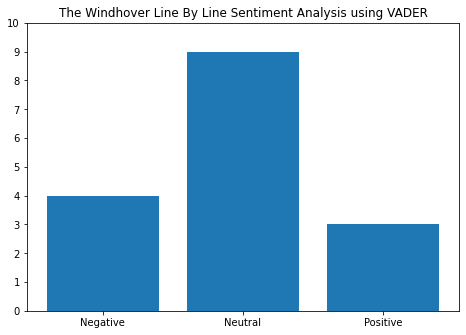

In [6]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lbls = ['Negative', 'Neutral', 'Positive']
compounds = [neg, neu, pos]
ax.bar(lbls, compounds)
ax.set_title('The Windhover Line By Line Sentiment Analysis using VADER')
ax.set_yticks(np.arange(0, 11, 1))
plt.show()